# Data Science: Bank Marketing (Campaign) - Group Project

**Problem Statement:** ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

**Why ML Model:** Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more. This will save resource and their time ( which is directly involved in the cost ( resource billing)).

**Data Set Information :** The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Objective:** Obtain a model that determines whether or not X customer will buy your product, based on past interactions with the bank and other financial institutions.

In [ ]:
# Google Colab environment mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
import xgboost
sns.set()
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)

In [ ]:
# Dataset loading
from google.colab import drive
bank_df = pd.read_csv("/content/drive/MyDrive/Data Glacier/Datasets/bank-additional/bank-additional-full.csv", sep=";")

In [ ]:
#Omar
#bank_df= pd.read_csv("/content/bank-additional-full.csv",sep=";")

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
bank_df.shape

(41188, 21)

The dataset has 21 columns (features) and 41188 rows (instances)

# Data Understanding

## **1- Features**

### **Metadata**

#### **Clients Data**

The bank provide us with a data of almost 41 K clients wich were contacted during a marketing campaign. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product(bank term deposit) would be ('yes') or not ('no') subscribed.

1. `age`: int
2. `job`: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. `marital`: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. `education`:(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. `default`: has credit in default? (categorical: 'no','yes','unknown')
6. `housing`:  has housing loan? (categorical: 'no','yes','unknown')
7. `loan`:has personal loan? (categorical: 'no','yes','unknown')

#### **Data related with the last contact**
8. `contact`: contact communication type (categorical: 'cellular','telephone')
9. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
10. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### **Data related with the last campaign**

12. `campaign`:number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. `previous`: number of contacts performed before this campaign and for this client (numeric)
15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### **Data related with social and economic context**
16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
17. `cons.price.idx`: consumer price index - monthly indicator (numeric)
18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
20. `nr.employed`: number of employees - quarterly indicator (numeric)


#### **Result of the current campaign**
21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')

## **2- Clients**

### **Intro**

In [ ]:
y = bank_df.y.to_frame('y')
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [ ]:
clients= bank_df[bank_df.columns[:7]]
clients = pd.concat([clients,y],axis=1,join='outer')
clients.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


### **Age Analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

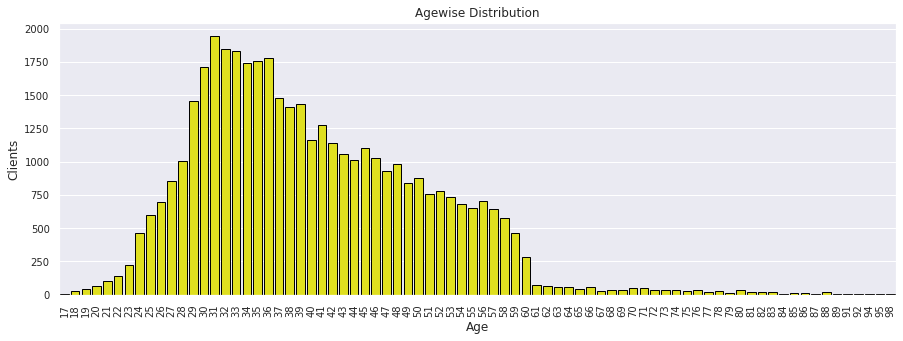

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'age', data = clients,color = "yellow", edgecolor ='black')
plt.xlabel("Age") 
plt.ylabel("Clients")
plt.title("Agewise Distribution")  
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Agewise Distribution')

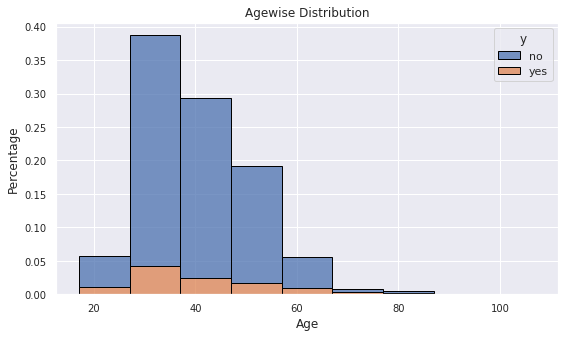

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=clients, x='age', hue='y', binwidth=10, multiple='stack', stat="probability", edgecolor ='black')
plt.xlabel("Age") 
plt.ylabel("Percentage")
plt.title("Agewise Distribution")  

- We group the ages into different age ranges (mainly to group those over 60)

In [ ]:
lst = [clients]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
clients.age_group.value_counts()
clients

30.0    16938
40.0    10526
50.0     6862
20.0     5669
60.0     1193
Name: age_group, dtype: int64

### **Clients univariate analysis**

In [ ]:
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan']

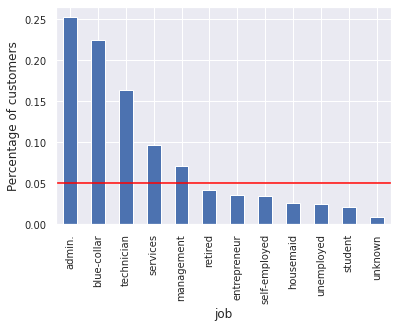

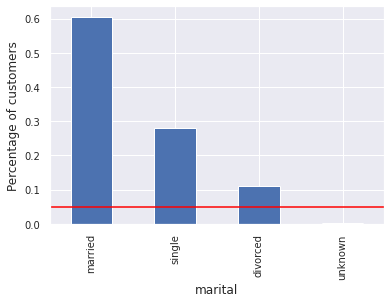

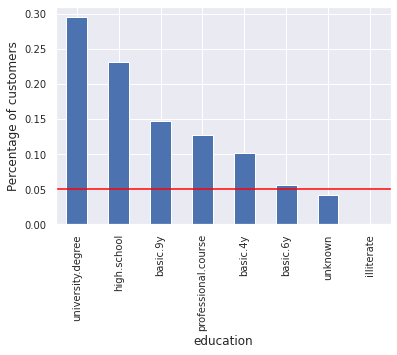

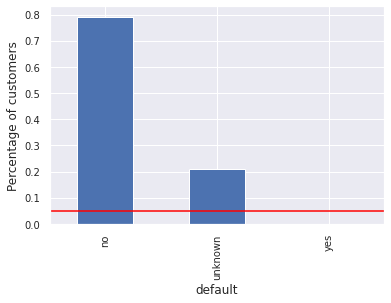

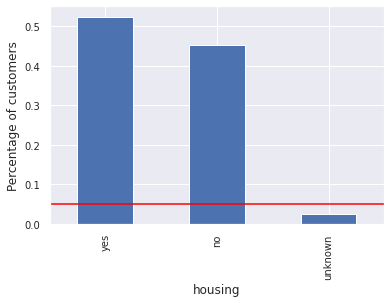

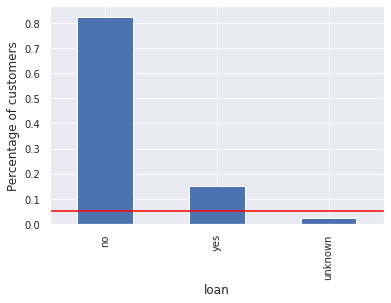

In [ ]:
total_customers = len(clients) 

# for each categorical variable
for col in categorical_cols:

    # count the number of customers per category and divide by total customers
    # aka percentage of houses per category

    temp_df = pd.Series(bank_df[col].value_counts() / total_customers)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of customers')
    plt.show()

The red line means 5% of the total class.

### **Clients bivariate analysis**

**Age distribution according to marital status**

---



---



Text(0.5, 1.0, 'Agewise Distribution')

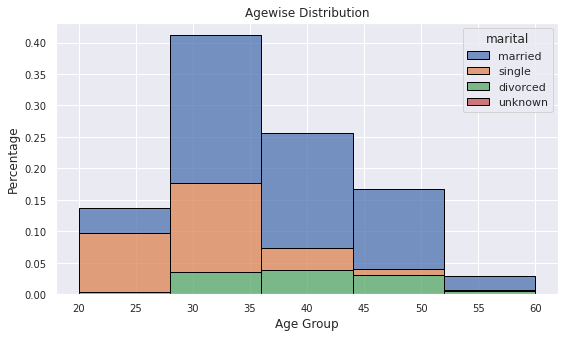

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=clients, x='age_group', hue='marital', binwidth=8, multiple='stack', stat="probability", edgecolor ='black')
plt.xlabel("Age Group") 
plt.ylabel("Percentage")
plt.title("Agewise Distribution")  

**Age distribution according to education**


---




Text(0.5, 1.0, 'Agewise Distribution')

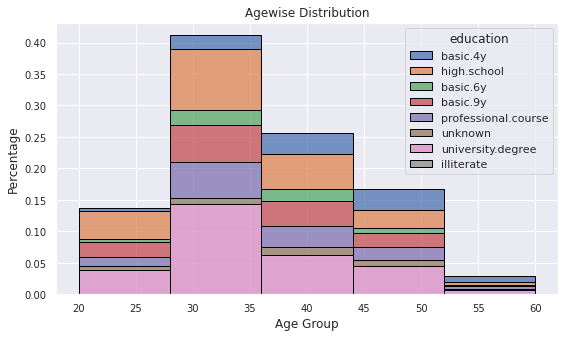

In [ ]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=clients, x='age_group', hue='education', binwidth=8, multiple='stack', stat="probability", edgecolor ='black')
plt.xlabel("Age Group") 
plt.ylabel("Percentage")
plt.title("Agewise Distribution")  

**Age distribution according to loan**


---




Text(0.5, 1.0, 'Agewise Loan')

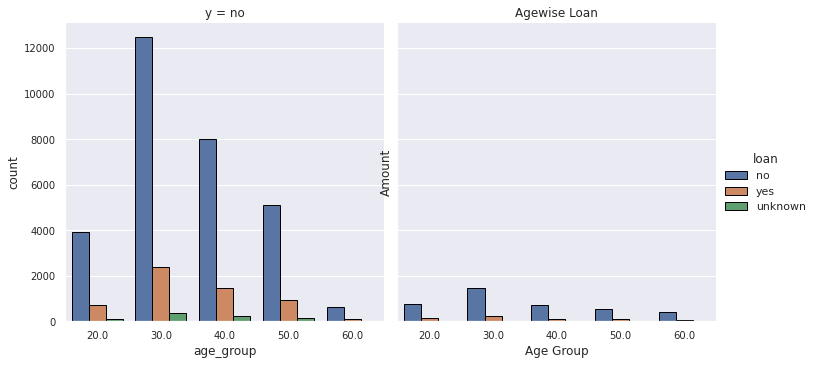

In [ ]:
sns.catplot(data=clients, x='age_group',hue ='loan',col='y', edgecolor ='black',kind='count')
plt.xlabel("Age Group") 
plt.ylabel("Amount")
plt.title("Agewise Loan") 


**Age distribution according to default**


---




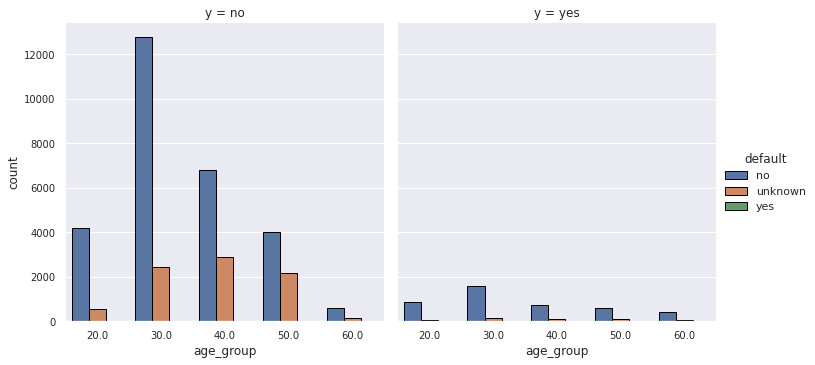

In [ ]:
sns.catplot(data=clients, x='age_group',hue ='default',col='y', edgecolor ='black',kind='count')

**Age distribution according to housing**


---




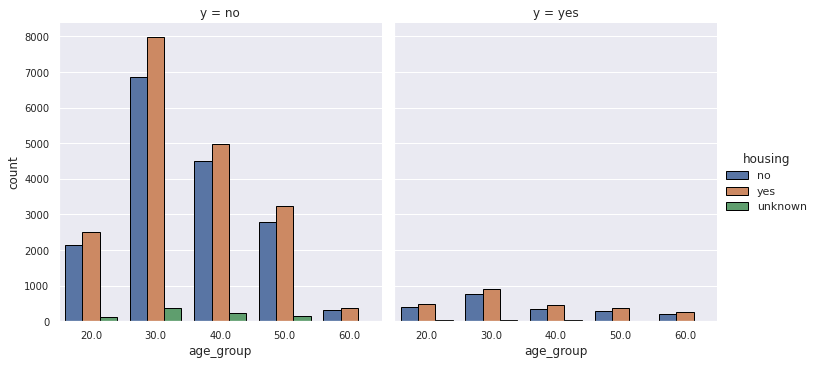

In [ ]:
sns.catplot(data=clients, x='age_group',hue ='housing',col='y', edgecolor ='black',kind='count')

As expected, the greatest conversion occurs with those who have a home.

  But beware, they do not keep the same proportion, in fact, the differences between those who have and do not have a house in the graph on the right, is less than on the left. **Therefore, we can intuit that this feature is not so characteristic**

**Age distribution according to education**


---

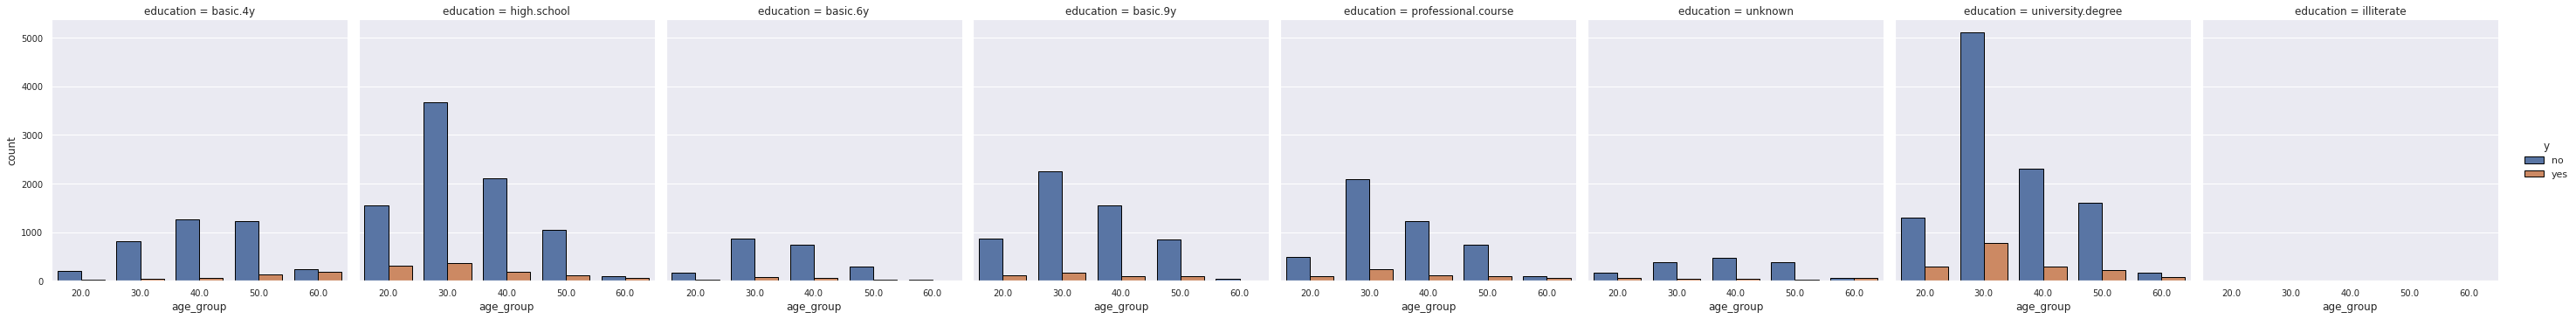

In [ ]:
sns.catplot(data=clients, x='age_group',hue ='y',col='education', edgecolor ='black',kind='count')

We can see that those who convert the most are those with a University education, followed by high school and then professional course.

In summary, the conclusions when making these crosses between the characteristics of the customers and whether they convert or not, are quite obvious and logical.

**Example:** As expected, those with a university degree convert more than those who have not finished high school


### **Conversion Analysis - Agewise**

**Table Nº1: Number of conversions in each age range.**

In [ ]:
total = pd.crosstab(clients['y'],clients['age_group'])
total.loc['Total',:]= total.sum(axis=0)
total['Total']= total.sum(axis=1)
total

age_group,20.0,30.0,40.0,50.0,60.0,Total
y,,,,,,
no,4747.0,15223.0,9692.0,6165.0,721.0,36548.0
yes,922.0,1715.0,834.0,697.0,472.0,4640.0
Total,5669.0,16938.0,10526.0,6862.0,1193.0,41188.0


**Table Nº2: Same as table 1. The new columns represent the percentage of the total conversions**

In [ ]:
conversiones_edad = pd.crosstab(clients['y'],clients['age_group'])
conversiones_edad = conversiones_edad.transpose() 
conversiones_edad.loc['Total',:]= conversiones_edad.sum(axis=0)
conversiones_edad['% No Conversión total'] = (conversiones_edad['no']/conversiones_edad['no'].sum())*200
conversiones_edad['% Si Conversión total'] = (conversiones_edad['yes']/conversiones_edad['yes'].sum())*200
conversiones_edad

y,no,yes,% No Conversión total,% Si Conversión total
age_group,,,,
20.0,4747.0,922.0,12.988399,19.870690
30.0,15223.0,1715.0,41.652074,36.961207
40.0,9692.0,834.0,26.518551,17.974138
50.0,6165.0,697.0,16.868228,15.021552
60.0,721.0,472.0,1.972748,10.172414
Total,36548.0,4640.0,100.000000,100.000000


**Table Nº3: Sample of the total of each range, what percentage of that range converts.**

In [ ]:
crosstab_edad = pd.crosstab(clients['y'],clients['age_group']).apply(lambda x: x/x.sum() * 100)
crosstab_edad = crosstab_edad.transpose() 
crosstab_edad

y,no,yes
age_group,,
20.0,83.736109,16.263891
30.0,89.874838,10.125162
40.0,92.076762,7.923238
50.0,89.842611,10.157389
60.0,60.435876,39.564124


**This is perhaps the most interesting:**

The first column shows the percentage of total customers that each rank represents.

The second column shows the percentage of customers in that range that convert

In [ ]:
age = pd.DataFrame(clients['age_group'].value_counts())
age['% del total de Clientes'] = age['age_group']*100/age['age_group'].sum() #Porcentaje del total de clientes
age['% Conversion según su clase'] = crosstab_edad['yes'] # Porcentaje de conversiones del total de esa clase
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True) 
age

,% del total de Clientes,% Conversion según su clase,age
20.0,13.763718,16.263891,20
30.0,41.123628,10.125162,30
40.0,25.555987,7.923238,40
50.0,16.660192,10.157389,50
60.0,2.896475,39.564124,60


<Figure size 1584x792 with 0 Axes>

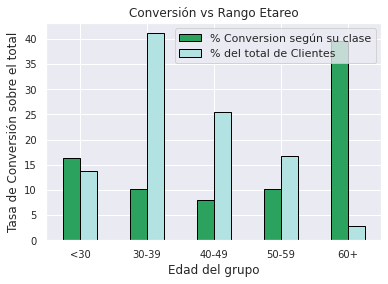

In [ ]:
plt.figure(figsize=(22,11))
age[['% Conversion según su clase','% del total de Clientes']].plot(kind = 'bar',color = ('#2ca25f','#b2e2e2'), edgecolor ='black')
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()

**Conclusions:**

- The most efficient conversion is in the group +60. This class converts 39.6%. [`4 out of 10 people '+60' who connect with the bank, sign up`]. The point against, is that this class represents 2.89% of total customers

- Of all the conversions, the 30's group is the highest (with 36.96% - see table N2). In other words, `conversions in this group represent almost 40% of the bank's customers.` The downside is that it is not very efficient, since the conversion rate of its class is 10.12%.

- The least efficient conversion is in the group of 40 with 7.9%


<font color = 'red'> **First Recommendation:** </font> Aim the calls to the ethereal extremes. It makes sense that age extremes are risk averse, the young because they can save for education and the elderly because they need to ensure their retirement.

### **Client's Social variables**

1- **Job**

In [ ]:
clients.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

##############################################
Unkown job clients =  330
##############################################
Percentage of unknown client's job = 0.8 %


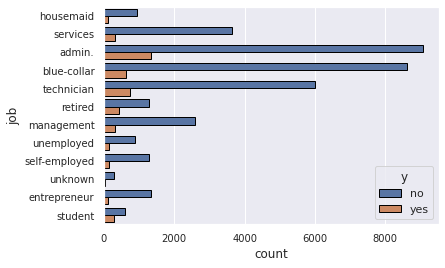

In [ ]:
sns.countplot(data=clients, y='job',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown job clients = ', bank_df[(bank_df['job'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's job =" ,round(bank_df[(bank_df['job'] =='unknown')].shape[0]/bank_df.shape[0]*100,2),'%')

In [ ]:
tabla= pd.crosstab(clients['job'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)
tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100
tabla.sort_values('%conversion',ascending=False)

y,no,yes,%conversion
job,,,
student,600.0,275.0,31.428571
retired,1286.0,434.0,25.232558
unemployed,870.0,144.0,14.201183
admin.,9070.0,1352.0,12.972558
Total,36548.0,4640.0,11.265417
management,2596.0,328.0,11.217510
unknown,293.0,37.0,11.212121
technician,6013.0,730.0,10.826042
self-employed,1272.0,149.0,10.485574


2- **Marital**

In [ ]:
clients.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

##############################################
Unkown marital status of clients =  80
##############################################
Percentage of unknown client's marital status = 0.19 %


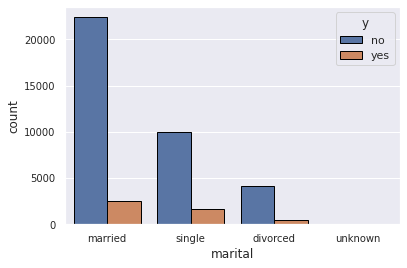

In [ ]:
sns.countplot(data=clients, x='marital',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown marital status of clients = ', bank_df[(bank_df['marital'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's marital status =" ,round(bank_df[(bank_df['marital'] =='unknown')].shape[0]/bank_df.shape[0]*100,2),'%')

In [ ]:
tabla= pd.crosstab(clients['marital'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)
tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100
tabla

y,no,yes,%conversion
marital,,,
divorced,4136.0,476.0,10.320902
married,22396.0,2532.0,10.157253
single,9948.0,1620.0,14.004149
unknown,68.0,12.0,15.000000
Total,36548.0,4640.0,11.265417


3- Education

##############################################
Unkown education status of clients =  1731
##############################################
Percentage of unknown client's education status = 4.2 %


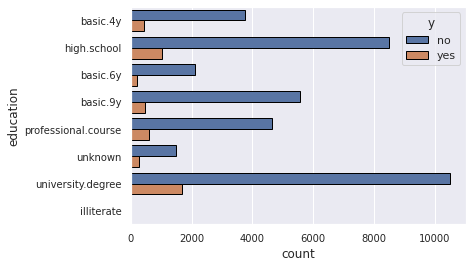

In [ ]:
sns.countplot(data=clients, y='education',hue ='y', edgecolor ='black')
print('##############################################')
print('Unkown education status of clients = ', bank_df[(bank_df['education'] =='unknown')].shape[0])
print('##############################################')
print("Percentage of unknown client's education status =" ,round(bank_df[(bank_df['education'] =='unknown')].shape[0]/bank_df.shape[0]*100,2),'%')

In [ ]:
tabla.loc['Total'][0:2].values.sum()

41188.0

In [ ]:
tabla= pd.crosstab(clients['education'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)

tabla['% of all clients'] = ((tabla['yes']+tabla['no'])/ tabla.loc['Total'][0:2].values.sum())*100

tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100

tabla['A*C']= tabla['% of all clients']*tabla['%conversion']
tabla.sort_values('% of all clients',ascending=False)


y,no,yes,% of all clients,%conversion,A*C
education,,,,,
Total,36548.0,4640.0,100.000000,11.265417,1126.541711
university.degree,10498.0,1670.0,29.542585,13.724523,405.457900
high.school,8484.0,1031.0,23.101389,10.835523,250.315626
basic.9y,5572.0,473.0,14.676605,7.824648,114.839274
professional.course,4648.0,595.0,12.729436,11.348465,144.459551
basic.4y,3748.0,428.0,10.138875,10.249042,103.913761
basic.6y,2104.0,188.0,5.564728,8.202443,45.644362
unknown,1480.0,251.0,4.202680,14.500289,60.940080
illiterate,14.0,4.0,0.043702,22.222222,0.971157


### **Client's Economic variables**

1- Default:

In [ ]:
bank_df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

##############################################
Unkown default clients =  20.87258424783918
##############################################
Unkown default clients which bought the  term deposit=  5.152960335000581
##############################################


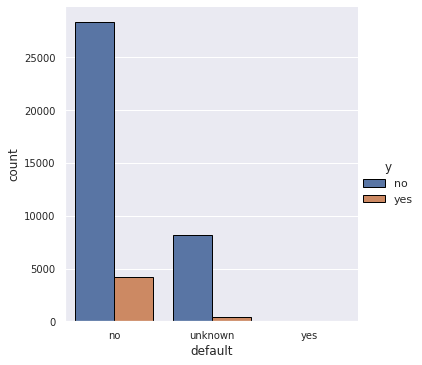

In [ ]:
sns.catplot(data=clients, x='default',hue ='y', edgecolor ='black',kind='count')
print('##############################################')
print('Unkown default clients = ', bank_df[(bank_df['default'] =='unknown')].shape[0]/bank_df.shape[0]*100)
print('##############################################')
print('Unkown default clients which bought the  term deposit= ', bank_df[(bank_df['default'] =='unknown')&(bank_df['y'] =='yes')].shape[0]/bank_df[(bank_df['default'] =='unknown')].shape[0]*100)
print('##############################################')

**Ojo :** Los datos en los que no se sabe si el cliente posee default o no son 20,8% del total de las instancias. Es muy elevado el número como para pensar en imputarlos... crearía mucho sesgo...

In [ ]:
tabla= pd.crosstab(clients['default'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)
tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100
tabla

y,no,yes,%conversion
default,,,
no,28391.0,4197.0,12.878974
unknown,8154.0,443.0,5.152960
yes,3.0,0.0,0.000000
Total,36548.0,4640.0,11.265417


Para mí (nacho) eliminaría los unkown de esta categoría.

**2- Housing**

In [ ]:
bank_df.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

#########################################################
Percent of 'unknown' on client's housing =  2.40361270272895
#########################################################


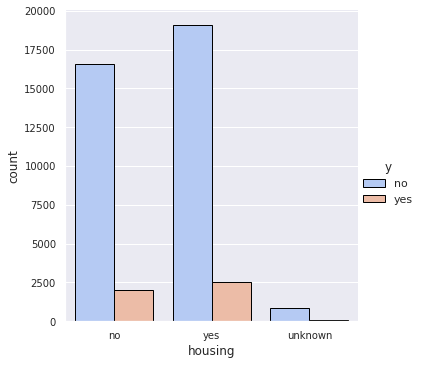

In [ ]:
sns.catplot(data=clients, x='housing',hue ='y', edgecolor ='black',kind='count',palette='coolwarm')
print('#########################################################')
print("Percent of 'unknown' on client's housing = ", bank_df[(bank_df['housing'] =='unknown')].shape[0]/bank_df.shape[0]*100)
print('#########################################################')

In [ ]:
house = pd.DataFrame(bank_df['housing'].value_counts())
house['% total'] = house['housing']*100/house['housing'].sum()
house

,housing,% total
yes,21576,52.384190
no,18622,45.212198
unknown,990,2.403613


In [ ]:
tabla= pd.crosstab(clients['housing'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)
tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100
tabla

y,no,yes,%conversion
housing,,,
no,16596.0,2026.0,10.879605
unknown,883.0,107.0,10.808081
yes,19069.0,2507.0,11.619392
Total,36548.0,4640.0,11.265417


La tasa de conversiones son bastante parecidas en el segmento de los que no poseen créditos hipotecarios - 10,88%, de los que si poseen este tipo de creditos - 11,62% ; diferencia menor a un punto porcentual. 

En la categoría de **unkown**(2,4 % de la muestra total), también tiene una tasa de conversión muy parecida - 10,8%. 

En conclusión, dado que el feature 'housing' no es un elemento muy decisivo para nuestro target (dado que las tasas de conversión segun la categoría son prácticamente las mismas), y adicionalmente, los 'unknown' se encuentran en muy baja cantidad los podemos imputar más adelante.

3- Loan

In [ ]:
bank_df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

#########################################################
Percent of 'unknown' on client's loan =  2.40361270272895
#########################################################


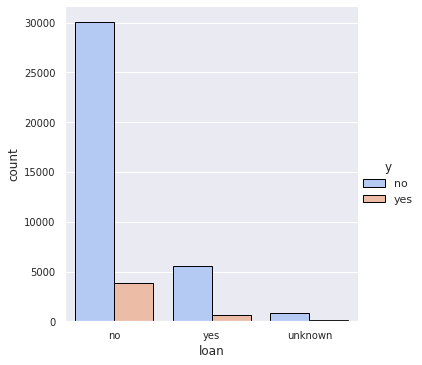

In [ ]:
sns.catplot(data=clients, x='loan',hue ='y', edgecolor ='black',kind='count',palette='coolwarm')
print('#########################################################')
print("Percent of 'unknown' on client's loan = ", bank_df[(bank_df['loan'] =='unknown')].shape[0]/bank_df.shape[0]*100)
print('#########################################################')

In [ ]:
tabla= pd.crosstab(clients['loan'],clients['y'])
tabla.loc['Total',:]= tabla.sum(axis=0)
tabla['%conversion'] = (tabla['yes']/(tabla['yes']+tabla['no']))*100
tabla

y,no,yes,%conversion
loan,,,
no,30100.0,3850.0,11.340206
unknown,883.0,107.0,10.808081
yes,5565.0,683.0,10.931498
Total,36548.0,4640.0,11.265417


## **3- Campaigns**

### Intro


In [ ]:
y = bank_df.y.to_frame('y')
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [ ]:
campaigns= bank_df[bank_df.columns[7:15]]
campaigns = pd.concat([campaigns,y],axis=1,join='outer')
campaigns.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,telephone,may,mon,261,1,999,0,nonexistent,no
1,telephone,may,mon,149,1,999,0,nonexistent,no
2,telephone,may,mon,226,1,999,0,nonexistent,no
3,telephone,may,mon,151,1,999,0,nonexistent,no
4,telephone,may,mon,307,1,999,0,nonexistent,no


Telephone conversions are = 5 % of all the telephone's calls
Cellular conversions are = 15 % of all the cellular's calls


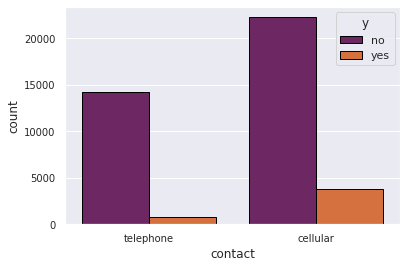

In [ ]:
sns.countplot(data=campaigns, x = 'contact', hue = 'y', palette='inferno', edgecolor ='black' )
#Finding each percentage
tel_yes= campaigns[(campaigns['y'] == 'yes') & (campaigns['contact'] == 'telephone')].shape[0]
tel_no= campaigns[(campaigns['y'] == 'no') & (campaigns['contact'] == 'telephone')].shape[0]
cel_yes= campaigns[(campaigns['y'] == 'yes') & (campaigns['contact'] == 'cellular')].shape[0]
cel_no= campaigns[(campaigns['y'] == 'no') & (campaigns['contact'] == 'cellular')].shape[0]

print('Telephone conversions are =',round(tel_yes/(tel_yes+tel_no)*100),"% of all the telephone's calls")
print('Cellular conversions are =',round(cel_yes/(cel_yes+cel_no)*100),"% of all the cellular's calls")


So, we could superficially conclude that the most effective means of contact is the cellular.

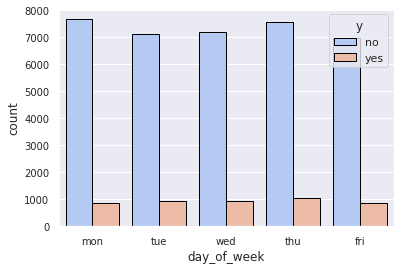

In [ ]:
sns.countplot(data=campaigns, x = 'day_of_week', hue = 'y', palette='coolwarm',edgecolor ='black' )

So, weekly the distribution is almost constant. 